<a href="https://colab.research.google.com/github/Gayathri05SK/MediCouncil/blob/main/Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Shape: (21686, 378)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21686 entries, 0 to 21685
Columns: 378 entries, diseases to neck weakness
dtypes: float64(312), int64(65), object(1)
memory usage: 62.5+ MB
None
         diseases  anxiety and nervousness  depression  shortness of breath  \
0  panic disorder                        1           0                    1   
1  panic disorder                        0           0                    1   
2  panic disorder                        1           1                    1   
3  panic disorder                        1           0                    0   
4  panic disorder                        1           1                    0   

   depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  \
0                                 1                 0          0         0   
1                                 1                 0          1         1   
2                                 1                 0          1   

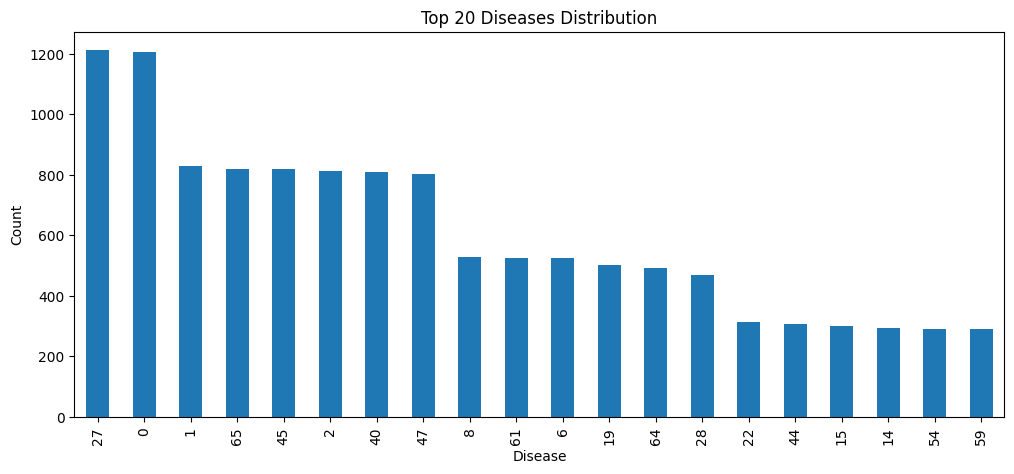

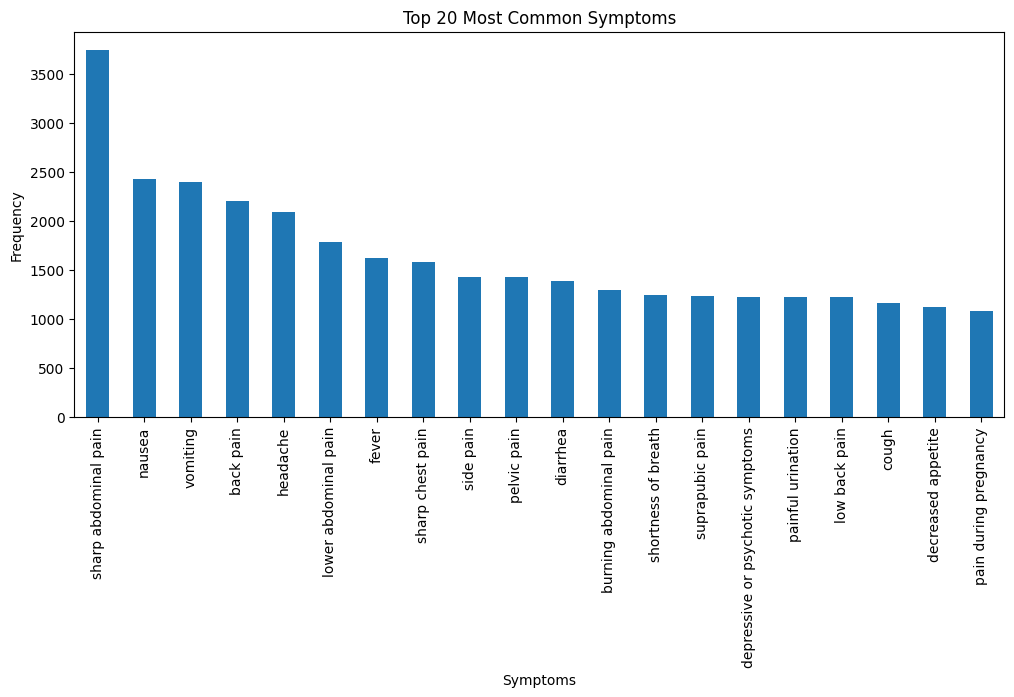

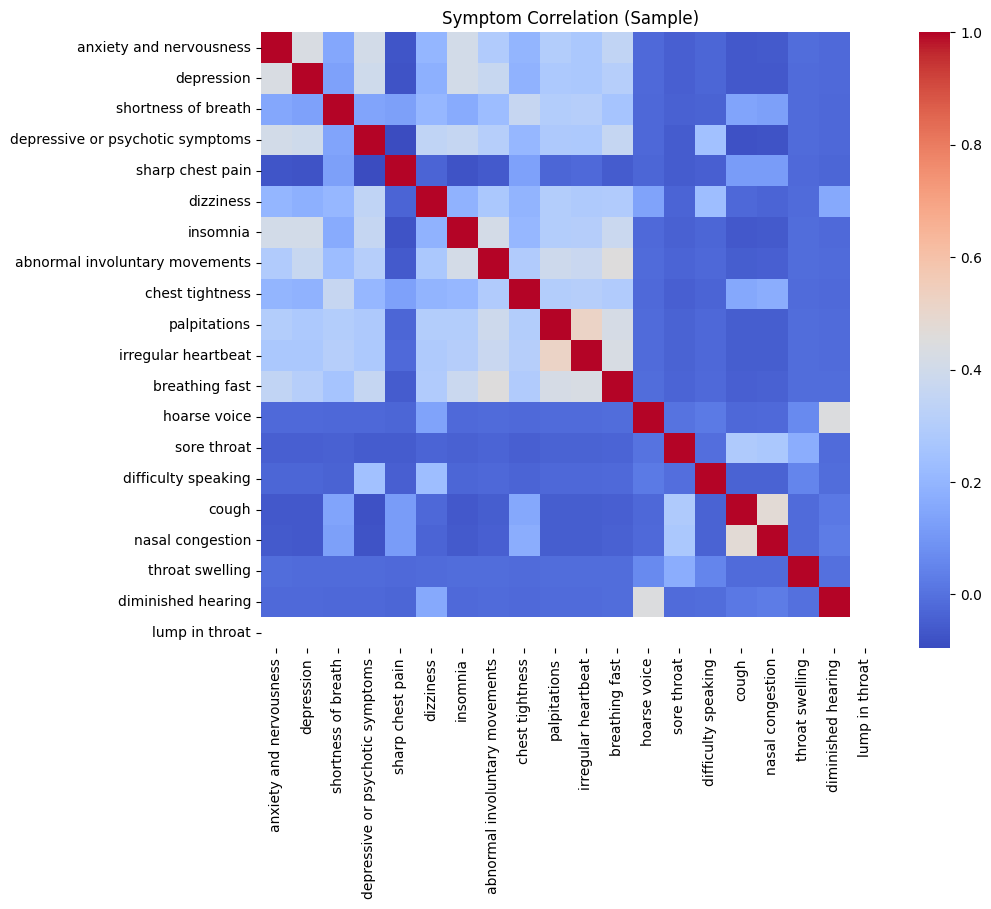

Train shape: (12724, 377)
Test shape: (3181, 377)


In [5]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)

# ===============================
# 2. LOAD DATASET
# ===============================
df = pd.read_csv("Disease and symptoms dataset.csv")

print("Original Shape:", df.shape)

# ===============================
# 3. BASIC INFO
# ===============================
print(df.info())
print(df.head())

# ===============================
# 4. DATA CLEANING
# ===============================

# Fill missing values
df.fillna(0, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

# ===============================
# 5. IDENTIFY TARGET & FEATURES
# ===============================
target_col = df.columns[0]      # Disease column
feature_cols = df.columns[1:]   # Symptom columns

print("Target:", target_col)
print("No. of symptoms:", len(feature_cols))

# ===============================
# 6. ENCODE TARGET
# ===============================
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

# ===============================
# 7. REMOVE RARE CLASSES (FIX ERROR)
# ===============================
class_counts = df[target_col].value_counts()
valid_classes = class_counts[class_counts > 1].index
df = df[df[target_col].isin(valid_classes)]

print("After removing rare classes:", df.shape)

# ===============================
# 8. OPTIONAL: SAMPLE DATA (if system is slow)
# ===============================
# Uncomment if memory issue
# df = df.sample(50000, random_state=42)

# ===============================
# 9. EDA
# ===============================

# Disease distribution
plt.figure(figsize=(12,5))
df[target_col].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Diseases Distribution")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()

# Symptom frequency
symptom_freq = df[feature_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
symptom_freq.head(20).plot(kind='bar')
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap (sample)
plt.figure(figsize=(10,8))
sns.heatmap(df[feature_cols[:20]].corr(), cmap="coolwarm")
plt.title("Symptom Correlation (Sample)")
plt.show()

# ===============================
# 10. TRAIN-TEST SPLIT
# ===============================
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)




Naive Bayes Accuracy: 0.9013069877534219
Logistic Regression Accuracy: 0.9195224863641042
Random Forest Accuracy: 0.9001749511165997


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best RF Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Tuned Random Forest Accuracy: 0.9018215498610682

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      1.00      1.00         1
           2       1.00      0.40      0.57         5
           3       0.94      0.94      0.94       162
           4       0.80      0.77      0.78       162
           5       0.57      0.53      0.55        30
           6       0.90      0.96      0.93       107
           7       0.95      0.98      0.96       241
           8       0.90      0.84      0.87       166
           9       0.99      0.99      0.99       161
          10       0.73      0.69      0.71        35
          12       0.96      0.96      0.96        28
          13       0.70      1.00      0.82         7
          14       0.78      0.77      0.78       163
          15       0.55      0.55

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


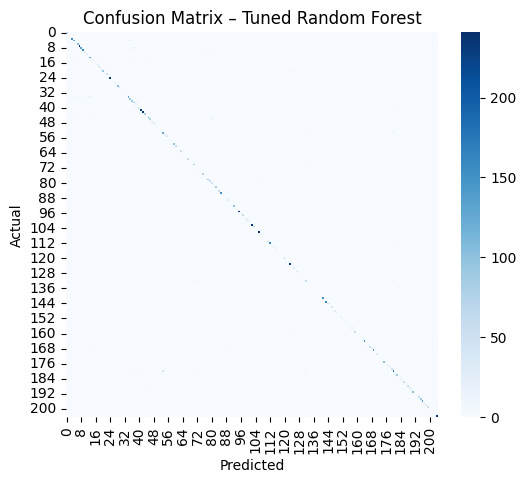


Cleaned dataset saved as Cleaned_Disease_Symptom_Dataset.csv


In [ ]:
# ===============================
# 11. BASELINE MODELS
# ===============================

# --- Naive Bayes ---
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# ===============================
# 12. HYPERPARAMETER TUNING (Random Forest)
# ===============================
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("\nBest RF Params:", grid_rf.best_params_)

# ===============================
# 13. EVALUATION OF TUNED MODEL
# ===============================
y_pred_best_rf = best_rf.predict(X_test)

print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))

# Confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), cmap="Blues")
plt.title("Confusion Matrix – Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# 14. SAVE CLEANED DATASET
# ===============================
df.to_csv("Cleaned_Disease_Symptom_Dataset.csv", index=False)

print("\nCleaned dataset saved as Cleaned_Disease_Symptom_Dataset.csv")

Naive Bayes Accuracy: 0.9509588179817667
Logistic Regression Accuracy: 0.9625903803835272
Random Forest Accuracy: 0.9506444514303678

Best Model Selected: Logistic Regression

Final Model Accuracy: 0.9625903803835272

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       241
           1       0.98      1.00      0.99       166
           2       0.99      0.99      0.99       163
           3       1.00      1.00      1.00         7
           4       0.79      0.94      0.86        32
           5       1.00      1.00      1.00        12
           6       0.96      0.99      0.98       105
           7       0.98      0.98      0.98        58
           8       0.95      0.94      0.95       106
           9       1.00      1.00      1.00        33
          10       0.97      0.68      0.80        53
          11       1.00      0.95      0.97        20
          12       0.00      0.00      0.00         1
 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


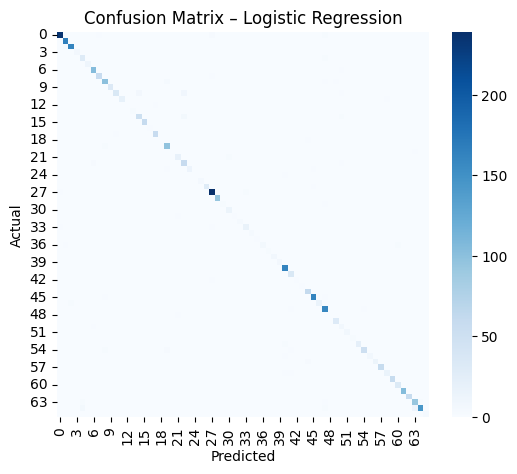


Available symptoms example:
Index(['anxiety and nervousness', 'depression', 'shortness of breath',
       'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness',
       'insomnia', 'abnormal involuntary movements', 'chest tightness',
       'palpitations', 'irregular heartbeat', 'breathing fast', 'hoarse voice',
       'sore throat', 'difficulty speaking', 'cough', 'nasal congestion',
       'throat swelling', 'diminished hearing', 'lump in throat'],
      dtype='object')

Enter symptoms separated by comma: Infrequent menstruation,mass on vulva,jawpain,itching,postpartum

Predicted Disease: vaginal yeast infection


In [6]:
# ===============================
# 11. BASELINE MODELS
# ===============================

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=50)
}

model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc}")

# ===============================
# 12. SELECT BEST MODEL
# ===============================
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]

print("\nBest Model Selected:", best_model_name)

# ===============================
# 13. FINAL EVALUATION
# ===============================
y_pred_best = best_model.predict(X_test)

print("\nFinal Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), cmap="Blues")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# 14. USER INPUT PREDICTION
# ===============================

def predict_disease(user_symptoms):
    """
    user_symptoms: list of symptom names entered by user
    """
    input_data = np.zeros(len(feature_cols))

    for symptom in user_symptoms:
        if symptom in feature_cols:
            idx = feature_cols.get_loc(symptom)
            input_data[idx] = 1
        else:
            print(f"Warning: '{symptom}' not found in symptom list")

    input_df = pd.DataFrame([input_data], columns=feature_cols)
    prediction = best_model.predict(input_df)
    disease_name = le.inverse_transform(prediction)

    return disease_name[0]

# ===============================
# 15. INTERACTIVE USER INPUT
# ===============================
print("\nAvailable symptoms example:")
print(feature_cols[:20])

user_input = input("\nEnter symptoms separated by comma: ").lower()
user_symptoms = [s.strip() for s in user_input.split(",")]

predicted_disease = predict_disease(user_symptoms)

print("\nPredicted Disease:", predicted_disease)
